In [1]:
from snn_delays.snn import SNN
from snn_delays.experimental_models.snn_delay_prun import P_DelaySNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils import train, get_device, propagate_batch, to_plot
from snn_delays.utils.test_behavior import tb_addtask
from snn_delays.utils.visualization_utils import plot_taus
device = get_device()

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


In [2]:
time_window = 50
batch_size = 128 # 128: anil kag

ckpt_dir = 'sequential_tests_24_2_25'

dataset = 'addtask_episodic'
#dataset = 'addtask' 

DL = DatasetLoader(dataset=dataset, caching='', num_workers=0, batch_size=batch_size, total_time=time_window)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()
#dataset_dict["time_ms"] = 2e3
dataset_dict["time_ms"] = 300

In [3]:
structure = (50, 2)

snn = P_DelaySNN(dataset_dict, structure=structure, connection_type='f', delay=(50,1), delay_type='h', delay_mask='random', n_pruned_delays=3,
           reset_to_zero=False, win=time_window, loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=True)

snn.set_network()
snn.use_amp = False
snn.model_name = f'addask_d_50_50'
snn.input2spike_th = None
snn.num_train_samples = batch_size


[INFO] Delays: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

[INFO] Delays o: tensor([0])
300
Delta t: 6.0 ms
mean of normal: 1.0502256128148466


In [4]:
snn_rnn = SNN(dataset_dict, structure=structure, connection_type='r', delay=None, delay_type='',
           reset_to_zero=False, win=time_window, loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=True)

snn_rnn.set_network()
snn_rnn.use_amp = False
snn_rnn.model_name = f'addask_rnn_50_50'
snn_rnn.input2spike_th = None
snn_rnn.num_train_samples = batch_size


[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
300
Delta t: 6.0 ms
mean of normal: 1.0502256128148466


In [5]:
snn_mf = SNN(dataset_dict, structure=structure, connection_type='mf', delay=None, delay_type='',
           reset_to_zero=False, win=time_window, loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=True)

snn_mf.multi_proj = 3

snn_mf.set_network()
snn_mf.use_amp = False
snn_mf.model_name = f'addask_mf_50_50'
snn_mf.input2spike_th = None
snn_mf.num_train_samples = batch_size


[INFO] Delays: tensor([0])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([0])

[INFO] Delays o: tensor([0])
300
Delta t: 6.0 ms
mean of normal: 1.0502256128148466


<Axes: xlabel='simulation timestep'>

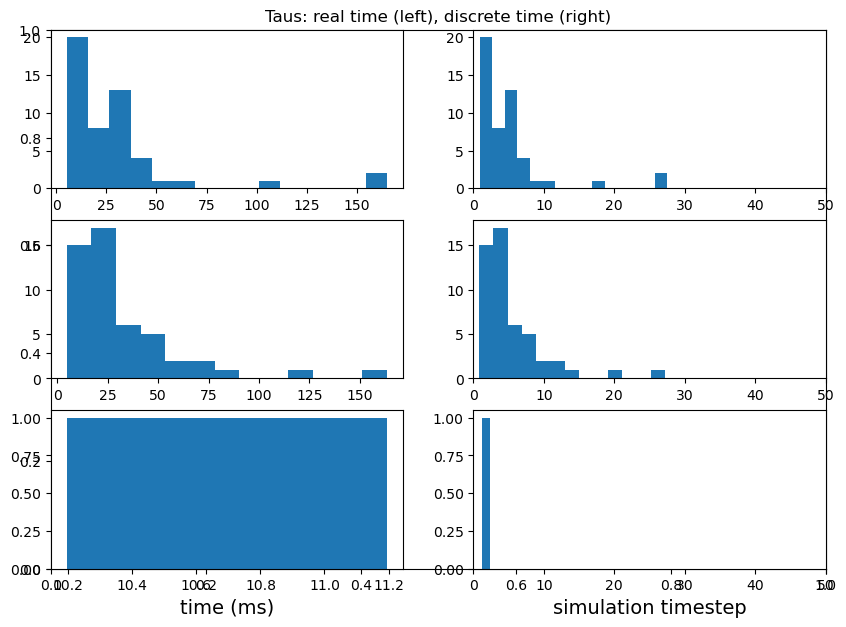

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plot_taus(snn)

<Axes: xlabel='simulation timestep'>

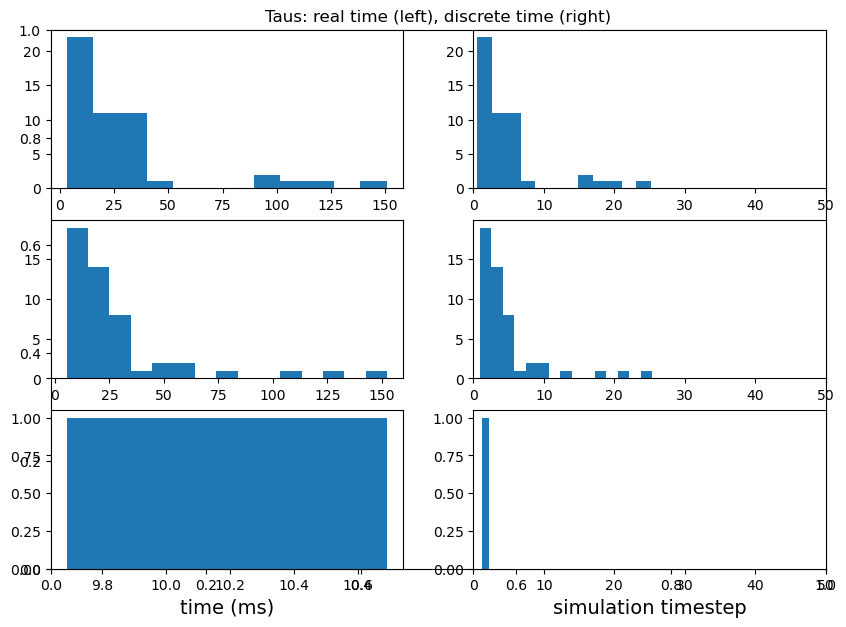

In [ ]:
plt.figure(figsize=(10,7))
plot_taus(snn_mf)

<Axes: xlabel='simulation timestep'>

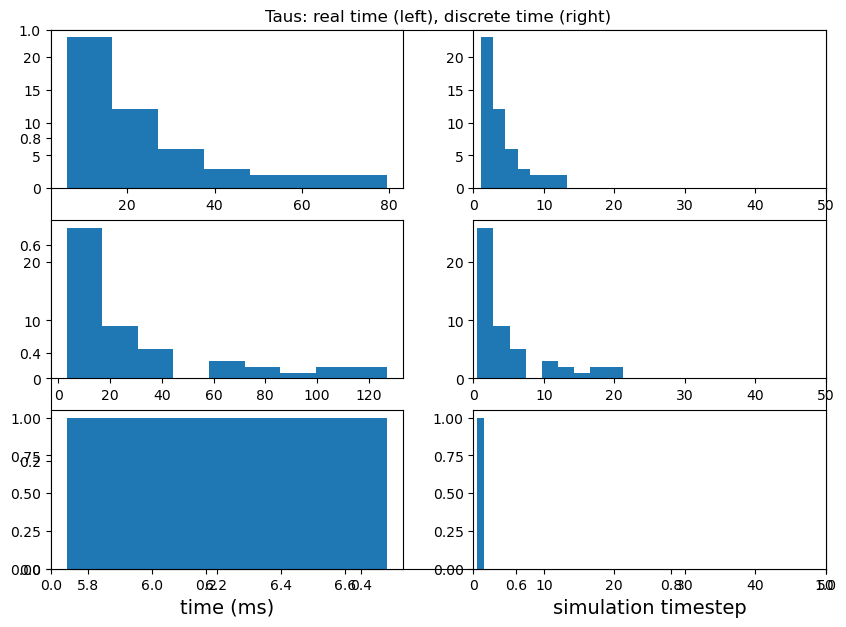

In [ ]:
plt.figure(figsize=(10,7))
plot_taus(snn_rnn)

In [10]:
train(snn_mf, train_loader, test_loader, 1e-3, 1000, ckpt_dir=ckpt_dir, test_behavior=tb_addtask, scheduler=(100, 0.95), freeze_taus=True, clear=True)

Epoch [1000/1000], learning_rates 0.000599, 0.059874
tensor([[1.1903, 1.1903, 1.1903,  ..., 1.1903, 1.1903, 1.1903],
        [0.7220, 0.7220, 0.7220,  ..., 0.7220, 0.7220, 0.7220],
        [1.0455, 1.0455, 1.0455,  ..., 1.0455, 1.0455, 1.0455],
        ...,
        [0.5057, 0.5057, 0.5057,  ..., 0.5057, 0.5057, 0.5057],
        [0.4901, 0.4901, 0.4901,  ..., 0.4901, 0.4901, 0.4901],
        [1.4686, 1.4686, 1.4686,  ..., 1.4686, 1.4686, 1.4686]],
       device='cuda:0')
Step [1/1], Loss: 0.12480
Time elasped: 0.19527053833007812


In [11]:
train(snn, train_loader, test_loader, 1e-3, 1000, ckpt_dir=ckpt_dir, test_behavior=tb_addtask, scheduler=(100, 0.95),freeze_taus=True, clear=True)

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\sequential_tests_24_2_25
Mean Error: 0.0005260551697574556% 
--------------------------


In [12]:
train(snn_rnn, train_loader, test_loader, 1e-3, 1000, ckpt_dir=ckpt_dir, test_behavior=tb_addtask, scheduler=(100, 0.95),freeze_taus=True, clear=True)

Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\sequential_tests_24_2_25
Mean Error: 0.0010625880677253008% 
--------------------------


Text(0.5, 1.0, 'train loss')

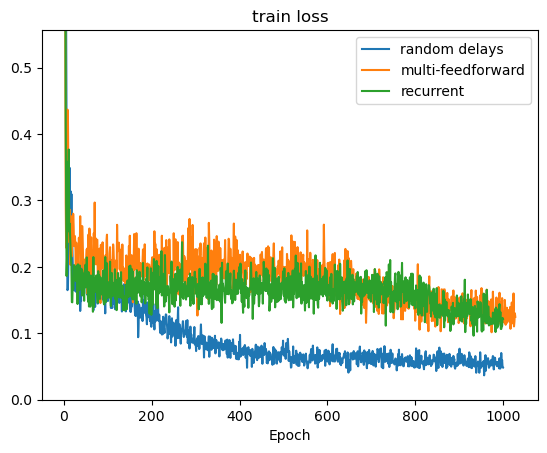

In [14]:
from snn_delays.utils.visualization_utils import plot_per_epoch
import numpy as np

loss_error = np.mean(np.array(snn.train_loss)[:,1][-100:])
plot_per_epoch(snn.train_loss, label = 'random delays')
plot_per_epoch(snn_mf.train_loss, label = 'multi-feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
#plt.title(f'loss error = {loss_error}')

plt.ylim(0, 10*loss_error)
plt.title('train loss')

In [15]:
images, labels = propagate_batch(snn, test_loader)
_, labels_mf = propagate_batch(snn_mf, test_loader)
_, labels_rnn = propagate_batch(snn_rnn, test_loader)

0.2580761


Text(0.5, 0, 'training sample')

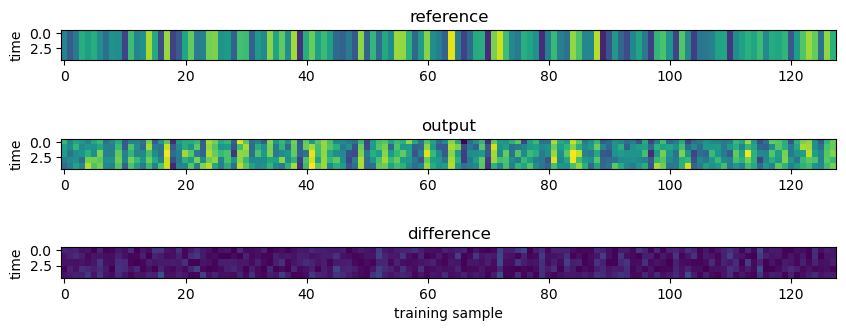

In [16]:
ref = labels[:,:5,0].T.cpu().numpy()
out = snn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()
diff = abs(ref-out[:,:,0])

print(np.mean(diff))

plt.figure(figsize=(10,4))
plt.subplot(311)
plt.imshow(ref, vmin=0, vmax=2)
plt.title('reference')
plt.ylabel('time')

plt.subplot(312)
plt.imshow(out, vmin=0, vmax=2)
plt.title('output')
plt.ylabel('time')

plt.subplot(313)
plt.imshow(diff, vmin=0, vmax=4)
plt.title('difference')
plt.ylabel('time')
plt.xlabel('training sample')

Text(0.5, 0, 'training sample')

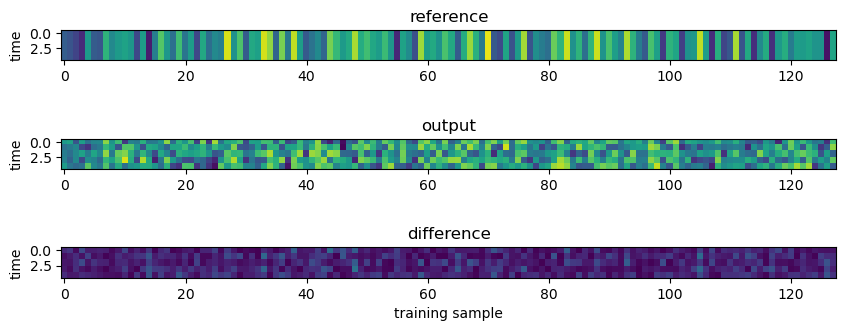

In [17]:
ref_mf = labels_mf[:,:5,0].T.cpu().numpy()
out_mf = snn_mf.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()
diff_mf = abs(ref_mf-out_mf[:,:,0])

plt.figure(figsize=(10,4))
plt.subplot(311)
plt.imshow(ref_mf, vmin=0, vmax=2)
plt.title('reference')
plt.ylabel('time')

plt.subplot(312)
plt.imshow(out_mf, vmin=0, vmax=2)
plt.title('output')
plt.ylabel('time')

plt.subplot(313)
plt.imshow(diff_mf, vmin=0, vmax=4)
plt.title('difference')
plt.ylabel('time')
plt.xlabel('training sample')

Text(0.5, 0, 'training sample')

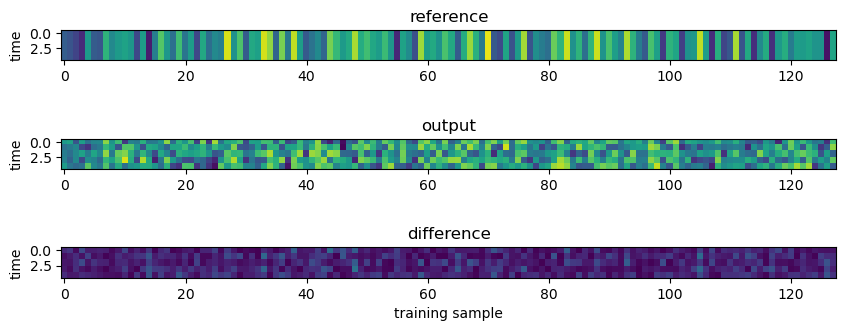

In [18]:
ref_rnn = labels_rnn[:,:5,0].T.cpu().numpy()
out_rnn = snn_rnn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()
diff_rnn = abs(ref_rnn-out_rnn[:,:,0])

plt.figure(figsize=(10,4))
plt.subplot(311)
plt.imshow(ref_mf, vmin=0, vmax=2)
plt.title('reference')
plt.ylabel('time')

plt.subplot(312)
plt.imshow(out_mf, vmin=0, vmax=2)
plt.title('output')
plt.ylabel('time')

plt.subplot(313)
plt.imshow(diff_mf, vmin=0, vmax=4)
plt.title('difference')
plt.ylabel('time')
plt.xlabel('training sample')

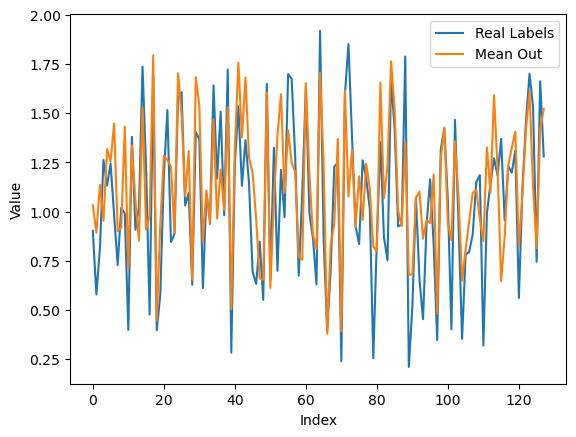

In [19]:
mean_out = np.mean(out, axis=0)

real_labels = labels[:, 0, 0]

plt.plot(real_labels, label='Real Labels')
#plt.plot(max_out, label='Max Out')
plt.plot(mean_out, label='Mean Out')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

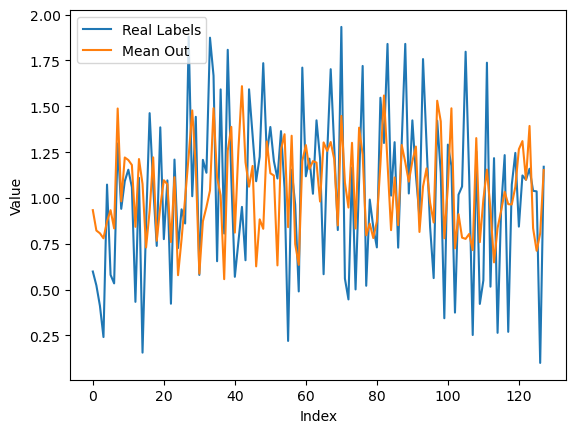

In [20]:
mean_out_mf = np.mean(out_mf, axis=0)

real_labels = labels_mf[:, 0, 0]

plt.plot(real_labels, label='Real Labels')
#plt.plot(max_out, label='Max Out')
plt.plot(mean_out_mf, label='Mean Out')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

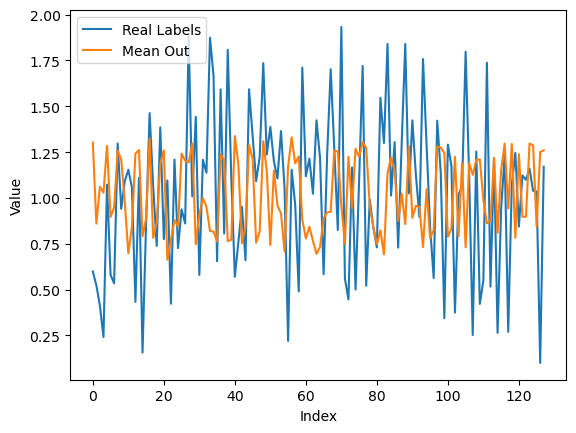

In [21]:
mean_out_mf = np.mean(out_rnn, axis=0)

real_labels = labels_mf[:, 0, 0]

plt.plot(real_labels, label='Real Labels')
#plt.plot(max_out, label='Max Out')
plt.plot(mean_out_mf, label='Mean Out')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

Text(0.5, 0, 'training sample')

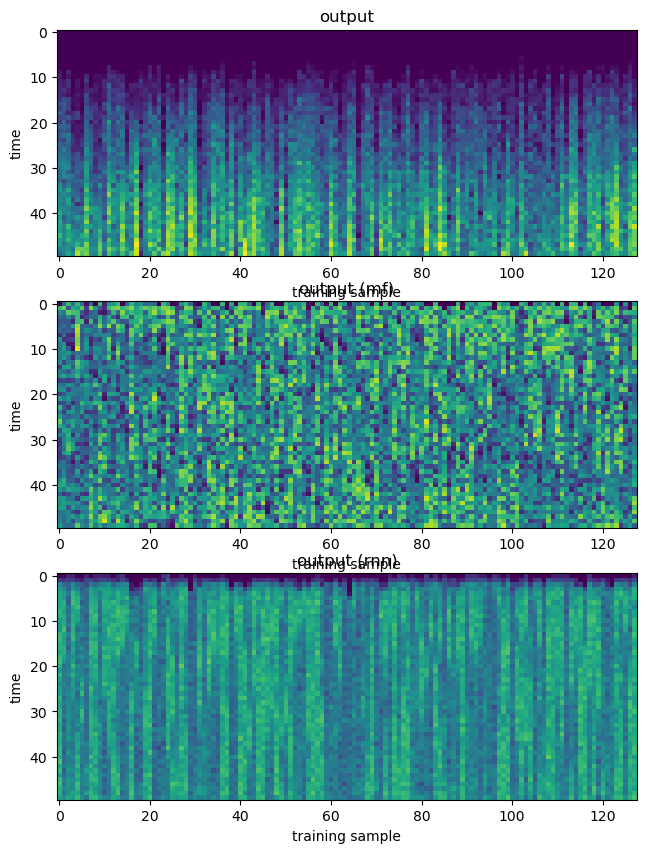

In [22]:
plt.figure(figsize=(10,10))

plt.subplot(3, 1, 1)
plt.imshow(snn.mem_state['output'].detach().cpu().numpy(), vmin=0, vmax=2)
plt.title('output')
plt.ylabel('time')
plt.xlabel('training sample')

plt.subplot(3, 1, 2)
plt.imshow(snn_mf.mem_state['output'].detach().cpu().numpy(), vmin=0, vmax=2)
plt.title('output (mf)')
plt.ylabel('time')
plt.xlabel('training sample')

plt.subplot(3, 1, 3)
plt.imshow(snn_rnn.mem_state['output'].detach().cpu().numpy(), vmin=0, vmax=2)
plt.title('output (rnn)')
plt.ylabel('time')
plt.xlabel('training sample')

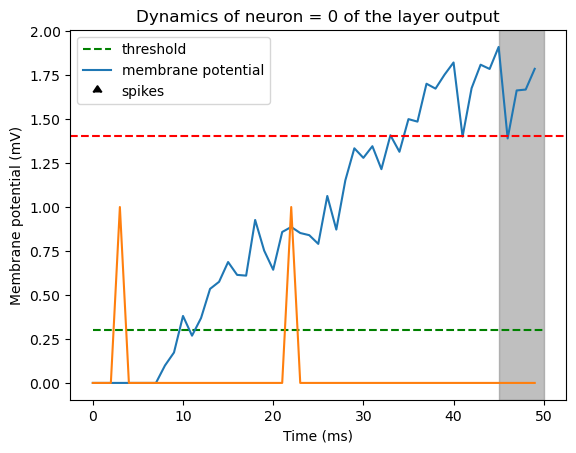

In [23]:
from snn_delays.utils.visualization_utils import visualize_activity
import torch

N = np.random.randint(batch_size)
reference = torch.sum(snn.spike_state['input'][:,N,1]* snn.spike_state['input'][:,N,0]).item()

#print(labels[N,:,0])
visualize_activity(snn, 'output', sample=N)
plt.plot(snn.spike_state['input'][:,N,1].cpu().numpy())
plt.axhline(y=reference, color='r', linestyle='--')
plt.axvspan(0.9*time_window,time_window, color='gray', alpha=0.5)

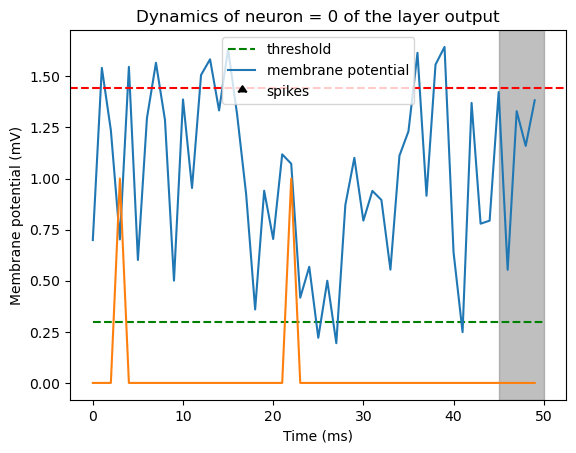

In [24]:
#N = np.random.randint(batch_size)
reference = torch.sum(snn_mf.spike_state['input'][:,N,1]* snn_mf.spike_state['input'][:,N,0]).item()

#print(snn.spike_state['input'][:,N,1])

#print(labels[N,:,0])
visualize_activity(snn_mf, 'output', sample=N)
plt.plot(snn.spike_state['input'][:,N,1].cpu().numpy())
plt.axhline(y=reference, color='r', linestyle='--')

plt.axvspan(0.9*time_window,time_window, color='gray', alpha=0.5)

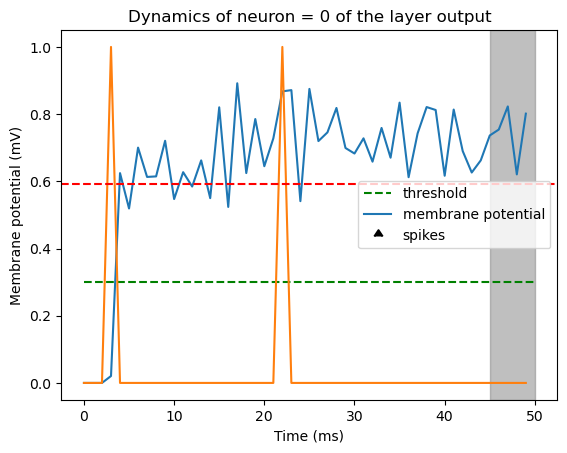

In [25]:
#N = np.random.randint(batch_size)
reference = torch.sum(snn_rnn.spike_state['input'][:,N,1]* snn_rnn.spike_state['input'][:,N,0]).item()

#print(snn.spike_state['input'][:,N,1])

#print(labels[N,:,0])
visualize_activity(snn_rnn, 'output', sample=N)
plt.plot(snn.spike_state['input'][:,N,1].cpu().numpy())
plt.axhline(y=reference, color='r', linestyle='--')

plt.axvspan(0.9*time_window,time_window, color='gray', alpha=0.5)

In [26]:
def get_errors_per_lapse(snn, num_trials):

    errors_per_lapse = [ [] for x in range(40)]

    for trial in range(num_trials):

        _, labels = propagate_batch(snn, test_loader)
        ref = labels[:,:5,0].T.cpu().numpy()
        out = snn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

        input_times = snn.spike_state['input'][:,:,1]

        outs = np.mean(out, axis=0)
        refs = np.mean(ref, axis=0)

        for sample in range(input_times.shape[1]):
            spike_times = torch.where(input_times[:, sample] == 1)[0]  # Get spike times
            dif = (spike_times[1] - spike_times[0]).item()
            errors_per_lapse[dif].append(abs(outs[sample]-refs[sample]))
    
    return errors_per_lapse

def plot_error_per_time(errors, label='Error per Time'):

    # Example nested list: times with corresponding errors
    # Replace this with your actual data
    times = range(40)

    # Calculate mean and standard deviation for each time point
    mean_errors = [np.mean(err) for err in errors]
    std_errors = [np.std(err) for err in errors]

    # Plotting
    #plt.figure(figsize=(10, 6))
    plt.errorbar(times, mean_errors, yerr=std_errors, fmt='o-', capsize=5, label=label)

    # Add labels and title
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.title('Error per Time with Deviation')
    plt.legend()
    plt.grid(True)

    return plt.gca()

In [27]:
errors = get_errors_per_lapse(snn, 100)
errors_mf = get_errors_per_lapse(snn_mf, 100)
errors_rnn = get_errors_per_lapse(snn_rnn, 100)

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


<Axes: title={'center': 'Error per Time with Deviation'}, xlabel='Time', ylabel='Error'>

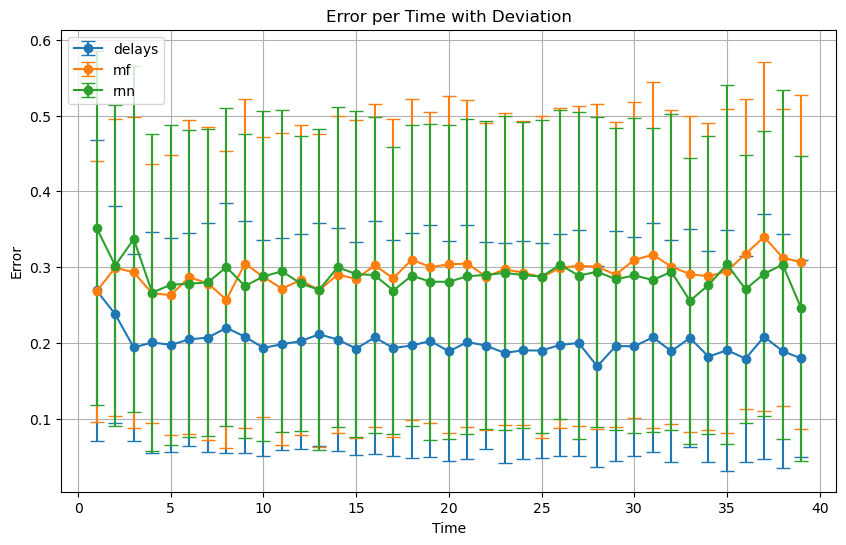

In [28]:
plt.figure(figsize=(10, 6))
plot_error_per_time(errors, 'delays')
plot_error_per_time(errors_mf, 'mf')
plot_error_per_time(errors_rnn, 'rnn')